# 20

In [205]:
array = []
start = None
end = None 

with open("test_input.txt", "r") as f:
    for row, line in enumerate(f): 
        row_content = list(line.strip())
        array.append(row_content)

        for col, char in enumerate(row_content):
            if char == "S":
                print(f"Start: ({row}, {col})")
                start = (row, col)
            if char == "E":
                print(f"End: ({row}, {col})")
                end = (row, col)


        


Start: (3, 1)
End: (7, 5)


In [206]:
from heapq import heappush, heappop

# Run Dijkstra from both sides?  

def dijkstra(array, start, end, steps = -1): 
    # Use heap for this as (score, node) pairs. 
    start = start
    current = [(0, start)] 

    MAX_DISTANCE = len(array) * len(array[0]) + 1

    # Store the distances here. 
    distances = [[MAX_DISTANCE for _ in range(len(array[0]))] for _ in range(len(array))]
    distances[start[0]][start[1]] = 0

    # Dijsktras algorithm.
    while len(current) > 0 and steps != 0: 
        distance, node = heappop(current)

        #if node == end:
        #    print(f"Found end in {distance} steps")
        #    break # BREAK EARLY


        # Insert new neighbor
        neighbors = [(node[0] + 1, node[1]), 
                    (node[0] - 1, node[1]), 
                    (node[0], node[1] + 1), 
                    (node[0], node[1] - 1)] # R -> rotat
        
        for neighbor in neighbors:

            # Out of bounds
            if neighbor[0] < 0 or neighbor[0] >= len(array) or neighbor[1] < 0 or neighbor[1] >= len(array[0]):
                continue

            # Wall
            if array[neighbor[0]][neighbor[1]] == "#":
                continue

            cost = 1
        
            # Add new path
            if distance + cost < distances[neighbor[0]][neighbor[1]]:
                distances[neighbor[0]][neighbor[1]] = distance + cost
                heappush(current, (distance + cost, neighbor))

        # Limit execution
        if steps != -1: 
            steps -= 1

    # for printing
    for row in range(len(array)):
        for col in range(len(array[0])):
            if distances[row][col] == MAX_DISTANCE:
                distances[row][col] = -1
    return distances

In [207]:
distances = dijkstra(array, start, end, -1)   

(-0.5, 14.5, 14.5, -0.5)

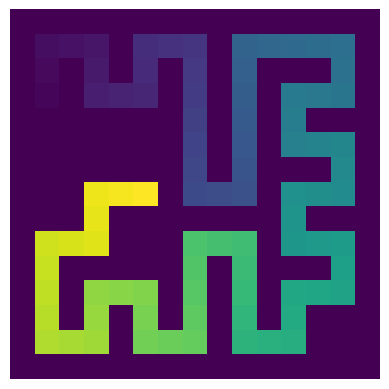

In [208]:
import matplotlib.pyplot as plt

plt.imshow(distances)
plt.axis("off")

In [209]:
from copy import deepcopy

cheat_dist = []

for row in range(len(array)):
    line = []
    for col in range(len(array[0])):
       
        if array[row][col] == "#":
            line.append(1)
        else:
            line.append(0)

    cheat_dist.append(line)

In [350]:
distance_to_end = distances[end[0]][end[1]]

cheats = dict() 

for row in range(len(distances)):
    for col in range(len(distances)):
        # vertical_cheat
        if row + 2 < len(distances):
            if distances[row][col] >= 0 and distances[row+1][col] == -1 and distances[row+2][col] >= 0:
                savings = abs(distances[row][col] - distances[row+2][col]) - 2

                # does it really help? 

                if max(distances[row][col], distances[row+2][col]) < distance_to_end + savings:
                    if savings in cheats:
                        cheats[savings] += 1
                    else:
                        cheats[savings] = 1

                    cheat_dist[row][col] = 0
                    cheat_dist[row+1][col] = 0.5
                    cheat_dist[row+2][col] = 0


        # horizontal_cheat
        if col + 2 < len(distances[0]):
            if distances[row][col] >= 0 and distances[row][col+1] == -1 and distances[row][col+2] >= 0:
                savings = abs(distances[row][col] - distances[row][col+2]) - 2

                if max(distances[row][col], distances[row][col+2]) < distance_to_end + savings:
                    if savings in cheats:
                        cheats[savings] += 1
                    else:
                        cheats[savings] = 1

                    cheat_dist[row][col] = 0
                    cheat_dist[row][col+1] = 0.5
                    cheat_dist[row][col+2] = 0




(-0.5, 14.5, 14.5, -0.5)

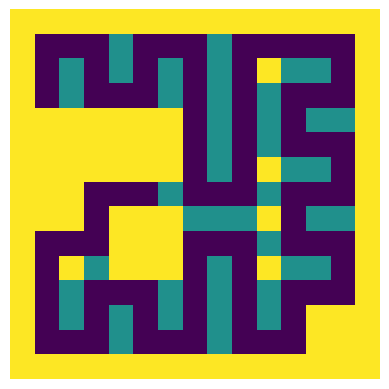

In [351]:
# Cheating plan :D 
plt.imshow(cheat_dist, cmap="viridis")
plt.axis("off")

In [352]:
result = 0 # number of cheats that save at least 100.

for savings, number_of_cheats in cheats.items():
    if savings >= 100:
        result += number_of_cheats

result

0

# Part 2 

In [353]:
array = []
start = None
end = None 

with open("test_input.txt", "r") as f:
    for row, line in enumerate(f): 
        row_content = list(line.strip())
        array.append(row_content)

        for col, char in enumerate(row_content):
            if char == "S":
                print(f"Start: ({row}, {col})")
                start = (row, col)
            if char == "E":
                print(f"End: ({row}, {col})")
                end = (row, col)


Start: (3, 1)
End: (7, 5)


In [354]:
distances = dijkstra(array, start, end, -1)

(-0.5, 14.5, 14.5, -0.5)

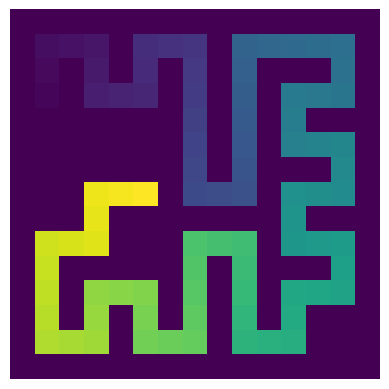

In [355]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(np.array(distances))
plt.axis("off")

In [356]:
distances

[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, 2, 3, 4, -1, 10, 11, 12, -1, 26, 27, 28, 29, 30, -1],
 [-1, 1, -1, 5, -1, 9, -1, 13, -1, 25, -1, -1, -1, 31, -1],
 [-1, 0, -1, 6, 7, 8, -1, 14, -1, 24, -1, 34, 33, 32, -1],
 [-1, -1, -1, -1, -1, -1, -1, 15, -1, 23, -1, 35, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, 16, -1, 22, -1, 36, 37, 38, -1],
 [-1, -1, -1, -1, -1, -1, -1, 17, -1, 21, -1, -1, -1, 39, -1],
 [-1, -1, -1, 82, 83, 84, -1, 18, 19, 20, -1, 42, 41, 40, -1],
 [-1, -1, -1, 81, -1, -1, -1, -1, -1, -1, -1, 43, -1, -1, -1],
 [-1, 78, 79, 80, -1, -1, -1, 60, 59, 58, -1, 44, 45, 46, -1],
 [-1, 77, -1, -1, -1, -1, -1, 61, -1, 57, -1, -1, -1, 47, -1],
 [-1, 76, -1, 70, 69, 68, -1, 62, -1, 56, -1, 50, 49, 48, -1],
 [-1, 75, -1, 71, -1, 67, -1, 63, -1, 55, -1, 51, -1, -1, -1],
 [-1, 74, 73, 72, -1, 66, 65, 64, -1, 54, 53, 52, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]]

(-0.5, 14.5, 14.5, -0.5)

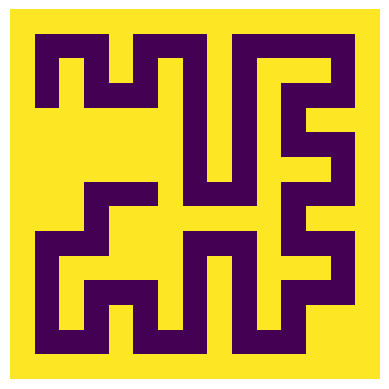

In [357]:
from copy import deepcopy

cheat_dist = []

for row in range(len(array)):
    line = []
    for col in range(len(array[0])):
       
        if array[row][col] == "#":
            line.append(1)
        else:
            line.append(0)

    cheat_dist.append(line)

plt.imshow(cheat_dist)
plt.axis("off")

In [348]:
distance_to_end = distances[end[0]][end[1]]
cheats = dict() 
radius = 2

for row in range(len(distances)):
    for col in range(len(distances)):
        
        for r in range(-radius, radius): 
            for c in range(-radius + r, radius - r):
                if abs(r) + abs(c) <= radius:
                    if 0 <= row + r < len(distances) and 0 <= col + c < len(distances[0]):
                        if distances[row][col] >= 0 and distances[row+r][col+c] >= 0:
                            savings = distances[row][col] - distances[row+r][col+c] - abs(r) - abs(c)

                            if savings > 0:
                                cheats[savings] = cheats.get(savings, 0) + 1


In [ ]:
cheats # weird 

{4: 9, 12: 2, 2: 9, 10: 2, 8: 2, 6: 1, 20: 1, 40: 1, 38: 1, 36: 1}

In [340]:
result = 0

for saving, number in cheats.items():
    if saving >= 50:
       result += number

result

0

Wrong: 

959990 (too low)
958438 (too low)

In [131]:
for savings, number in cheats.items():
    if savings >= 50: 
        print(f"Savings: {savings} Number: {number}")


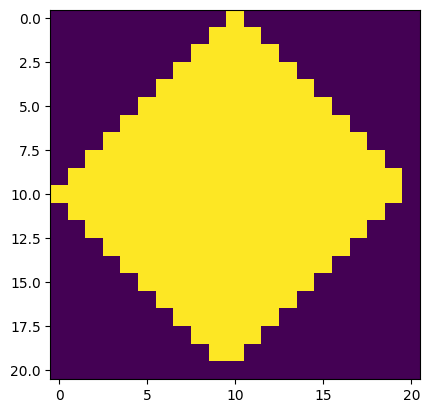

In [ ]:
radius = 10

test = np.zeros((2*radius+1,2*radius+1))

for r in range(-radius,radius): 
    for c in range(-radius+r, radius-r):
        
        if abs(r) + abs(c) <= radius:
            test[r+radius][c+radius] = 1

            

plt.imshow(test)